In [1]:
!pip install keras --upgrade
!pip install git+https://github.com/AI-Guru/ngdlm.git

    100% |████████████████████████████████| 317kB 6.3MB/s 
  Found existing installation: Keras 2.1.6
    Uninstalling Keras-2.1.6:
      Successfully uninstalled Keras-2.1.6
  Cloning https://github.com/AI-Guru/ngdlm.git to /tmp/pip-req-build-xd0l_w4_
  Running setup.py bdist_wheel for ngdlm ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-vt2_x41a/wheels/93/06/27/e156acb49f475c364c3c9fa4ad4ab7bfa38808bff5bf9c4647
Successfully built ngdlm


In [2]:
from keras import models, layers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [3]:
(x_input_train, _), (x_input_test, y_output_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_input_train = x_input_train.astype("float32") / 255.0
x_input_test = x_input_test.astype("float32") / 255.0

In [7]:
latent_dim = 2

# Encoder.
encoder_input = layers.Input(shape=(28, 28))
encoder_output = layers.Reshape((28*28,))(encoder_input) # Flatten
encoder_output = layers.Dense(512, activation="relu")(encoder_output)
encoder = models.Model(encoder_input, encoder_output)

# Decoder.
decoder_input = layers.Input(shape=(latent_dim,))
decoder_output = layers.Dense(512, activation="relu")(decoder_input)
decoder_output = layers.Dense((28*28), activation="sigmoid")(decoder_output)
decoder_output = layers.Reshape((28,28))(decoder_output)
decoder = models.Model(decoder_input, decoder_output)

# Autoencoder
vae = ngdlmodels.VAE(encoder, decoder, latent_dim=latent_dim)
vae.compile(optimizer="adadelta", loss = "binary_crossentropy")
vae.summary()


Encoder:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 512)          401920      reshape_1[0][0]                  
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_1[0][0]                    
__________________________________________________________________________________________________
z

In [8]:
history = vae.fit(
  x_input_train, x_input_train,
  epochs=100,
  batch_size = 32,
  shuffle=True,
  validation_data=(x_input_test,x_input_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 25s 420us/step - loss: 0.2725 - val_loss: 0.2461
Epoch 2/100
60000/60000 [==============================] - 22s 360us/step - loss: 0.2437 - val_loss: 0.2399
Epoch 3/100
60000/60000 [==============================] - 22s 368us/step - loss: 0.2388 - val_loss: 0.2360
Epoch 4/100
60000/60000 [==============================] - 22s 373us/step - loss: 0.2355 - val_loss: 0.2329
Epoch 5/100
60000/60000 [==============================] - 23s 386us/step - loss: 0.2327 - val_loss: 0.2302
Epoch 6/100
60000/60000 [==============================] - 22s 369us/step - loss: 0.2303 - val_loss: 0.2280
Epoch 7/100
60000/60000 [==============================] - 22s 363us/step - loss: 0.2282 - val_loss: 0.2261
Epoch 8/100
60000/60000 [==============================] - 22s 364us/step - loss: 0.2265 - val_loss: 0.2242
Epoch 9/100
60000/60000 [==============================] - 22s 359us/step - loss: 0.22

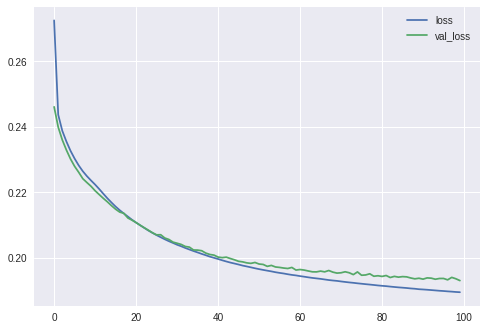

In [10]:
ngdlutils.render_history(history)

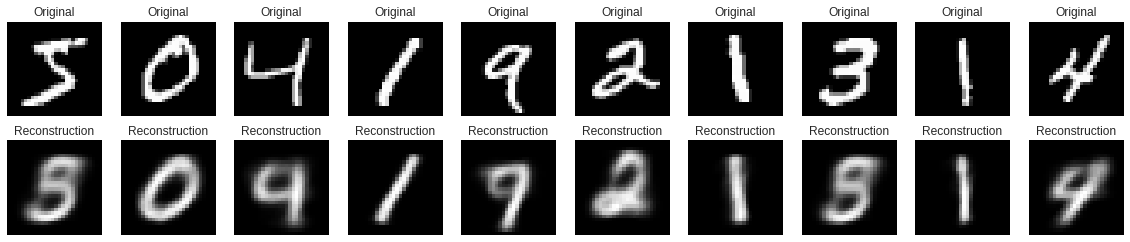

In [11]:
ngdlutils.render_image_reconstructions(vae, x_input_train[0:10])

(28, 28)


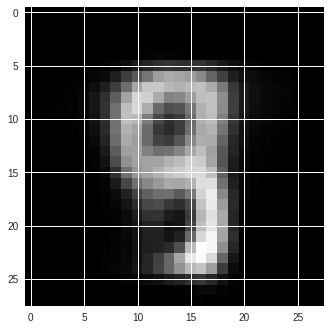

In [19]:
x = np.array([[0.5, 0.0]])
prediction = vae.decoder.predict(x)[0]
print(prediction.shape)

import matplotlib.pyplot as plt
plt.imshow(prediction, cmap="gray")
plt.show()
plt.close()

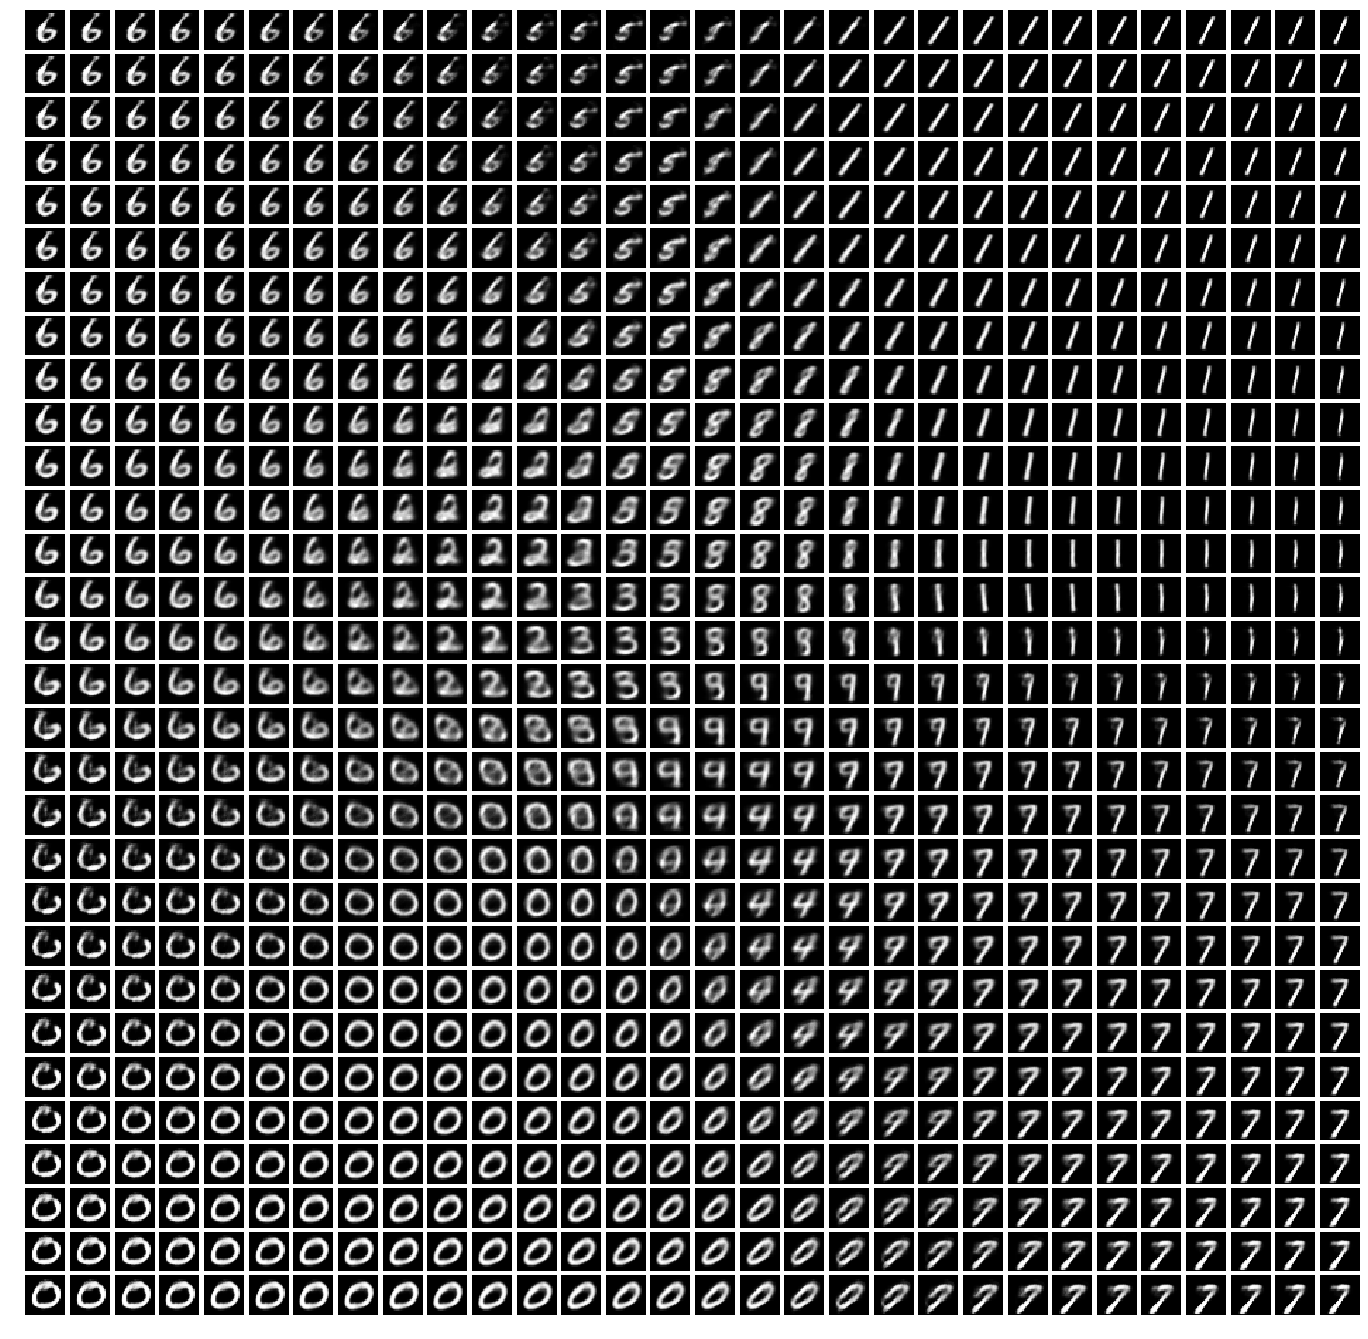

In [25]:
ngdlutils.render_image_latent_space(vae.decoder,30)

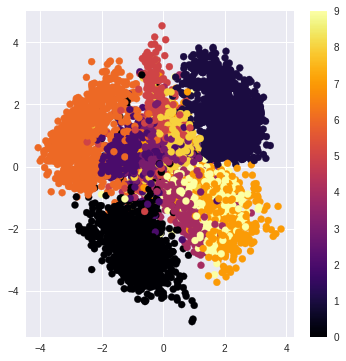

In [24]:
ngdlutils.render_encodings(vae.encoder, x_input_test, y_output_test)